In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\AL FARES\Desktop\Data_Science\weather.csv')

## Data Understanding

In [4]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [5]:
data.shape

(366, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

### check missing values

In [7]:
data.isnull().sum()*100

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine          300
WindGustDir       300
WindGustSpeed     200
WindDir9am       3100
WindDir3pm        100
WindSpeed9am      700
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [8]:
data1 = data.copy()

In [9]:
for features in data:
    if data[features].isnull().sum()>0:
        print(features,'::', np.round(data[features].isnull().mean(),4),'%')

Sunshine :: 0.0082 %
WindGustDir :: 0.0082 %
WindGustSpeed :: 0.0055 %
WindDir9am :: 0.0847 %
WindDir3pm :: 0.0027 %
WindSpeed9am :: 0.0191 %


In [10]:
data.describe() ### numerical/statical information

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [11]:
data.describe(include='O') ### categorical columns

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,363,335,365,366,366
unique,16,16,16,2,2
top,NW,SE,NW,No,No
freq,73,47,61,300,300


### check duplicates values

In [12]:
data.duplicated().sum()

0

###### NO duplicate values found.

### correlation between the columns

In [13]:
cor_col = data.corr()
cor_col

C:\Users\AL FARES\AppData\Local\Temp\ipykernel_9124\3017656899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_col = data.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


### Perform EDA == Exploarity Data Analysis

#### Categorical Features

In [14]:
data.describe(include='O').columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [15]:
print('Lenght of Cat_columns',len(data.describe(include='O').columns))

Lenght of Cat_columns 5


#### Numerical Features

In [16]:
data.describe().columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

In [17]:
print('Lenght of Num_columns',len(data.describe().columns)) 

Lenght of Num_columns 17


In [18]:
Today=data['RainToday'].value_counts()[:50]
Tomorrow=data['RainTomorrow'].value_counts()[:50]

In [19]:
Today

No     300
Yes     66
Name: RainToday, dtype: int64

In [20]:
Tomorrow

No     300
Yes     66
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainToday', ylabel='count'>

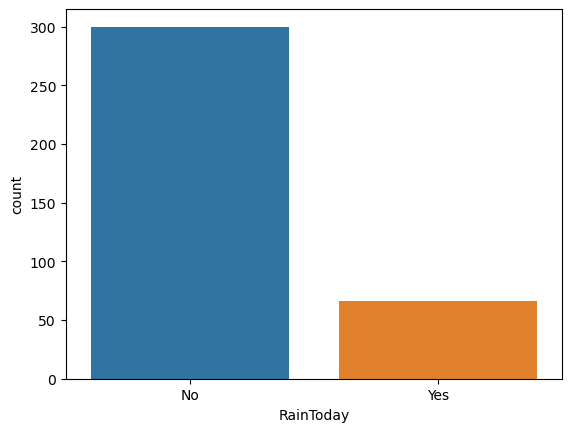

In [21]:
sns.countplot(x='RainToday',data=data)

<Axes: xlabel='RainTomorrow', ylabel='count'>

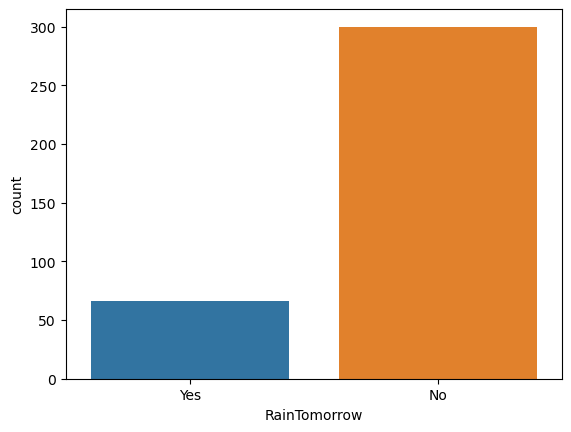

In [22]:
sns.countplot(x='RainTomorrow',data=data)

In [23]:
gust = data['WindGustDir'].value_counts()[:50]
wdir_nine = data['WindDir9am'].value_counts()[:50]
wdir_three = data['WindDir3pm'].value_counts()[:50]

### We will See the data in  visualisation/Plot  manner

#### Comparison between Rain Today,Tomorrow & windgustspeed

In [30]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("RainToday","RainTomorrow", "WindGustDir"))

fig.add_trace(go.Scatter(x=Today.values, y=Today.index),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=Tomorrow.values, y=Tomorrow.index),
                 row=1, col=2)

fig.add_trace(go.Scatter(x=gust.values, y=gust.index),
                 row=2, col=1)

fig.update_layout(showlegend=True, title_text="Raining Tomorrow and Today Comparison with WindGustDir")

fig.show()

#### Comparison between Rain Today,Tomorrow & windgustspeed@9_AM

In [31]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("RainToday","RainTomorrow", "WindGustDir"))

fig.add_trace(go.Scatter(x=Today.values, y=Today.index),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=Tomorrow.values, y=Tomorrow.index),
                 row=1, col=2)

fig.add_trace(go.Scatter(x=wdir_nine.values, y=wdir_nine.index),
                 row=2, col=1)

fig.update_layout(showlegend=True, title_text="Raining Tomorrow and Today Comparison with WindGustDir")

fig.show()

#### Comparison between Rain Today,Tomorrow & windgustspeed@3_PM

In [32]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("RainToday","RainTomorrow", "WindGustDir"))

fig.add_trace(go.Scatter(x=Today.values, y=Today.index),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=Tomorrow.values, y=Tomorrow.index),
                 row=1, col=2)

fig.add_trace(go.Scatter(x=wdir_three.values, y=wdir_three.index),
                 row=2, col=1)

fig.update_layout(showlegend=True, title_text="Raining Tomorrow and Today Comparison with WindGustDir")

fig.show()

In [33]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=gust.index, values=gust.values, name="WindGustDir"), 1, 1)

fig.add_trace(go.Pie(labels=wdir_nine.index, values=wdir_nine.values, name="WindDir9am"),1, 2)

fig.update_layout(showlegend=True, title_text="Comparison of the Wheather for Gust situation & wind Direction @9_PM")
fig.show()

fig.add_trace(go.Pie(labels=gust.index, values=gust.values, name="WindGustDir"), 1, 1)

fig.add_trace(go.Pie(labels=wdir_three.index, values=wdir_three.values, name="WindDir9am"),1, 2)

fig.update_layout(showlegend=True, title_text="Comparison of the Wheather for Gust situation & wind Direction @3_PM")

<Axes: >

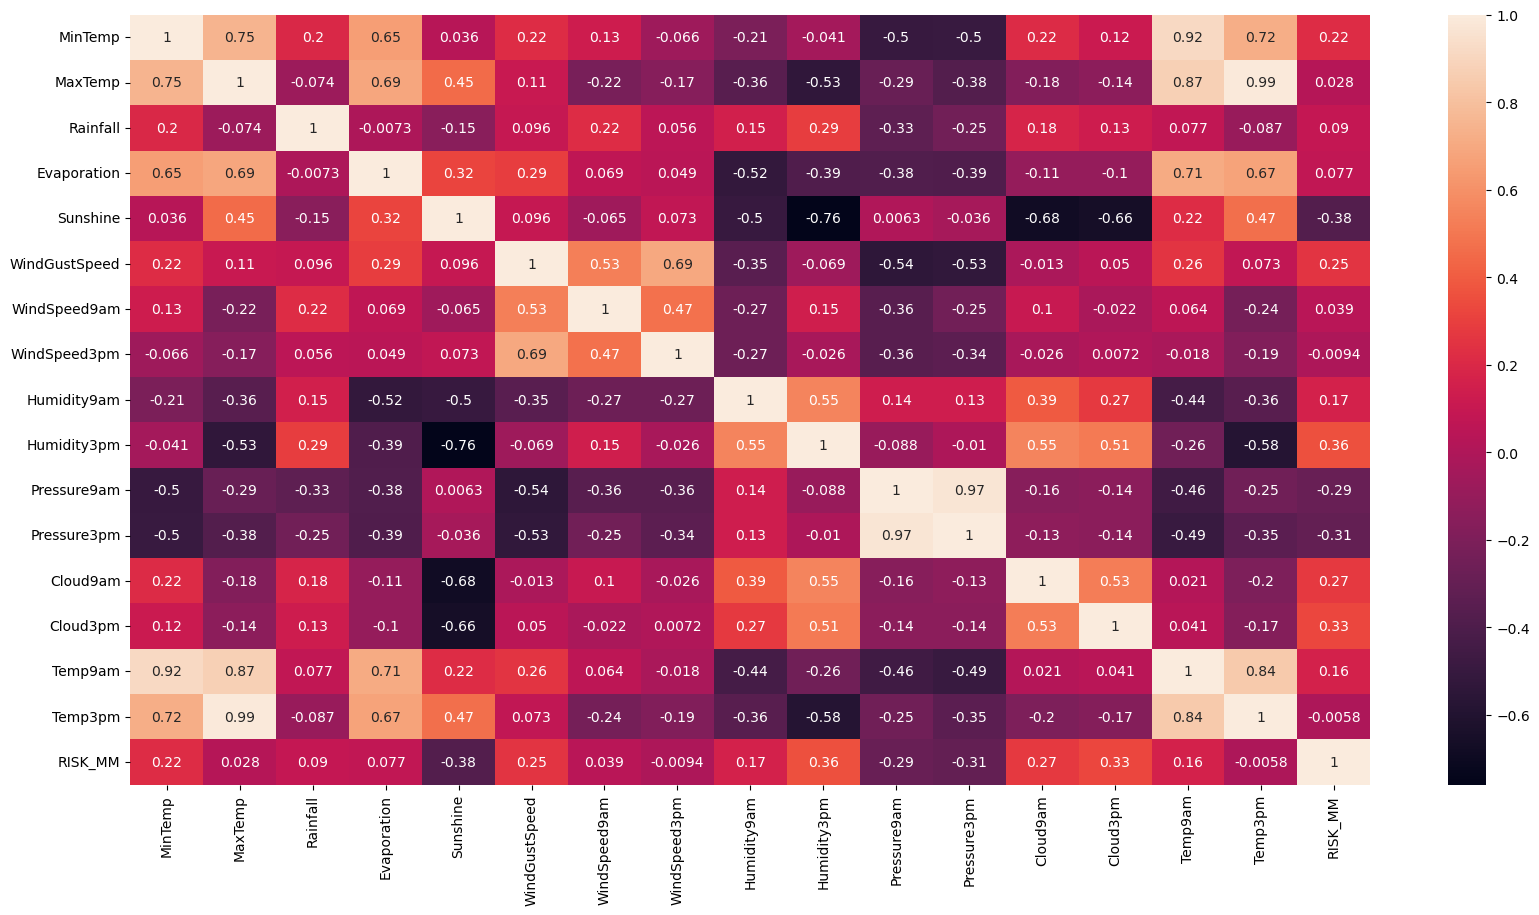

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(cor_col,annot=True)

<Figure size 2000x3000 with 0 Axes>

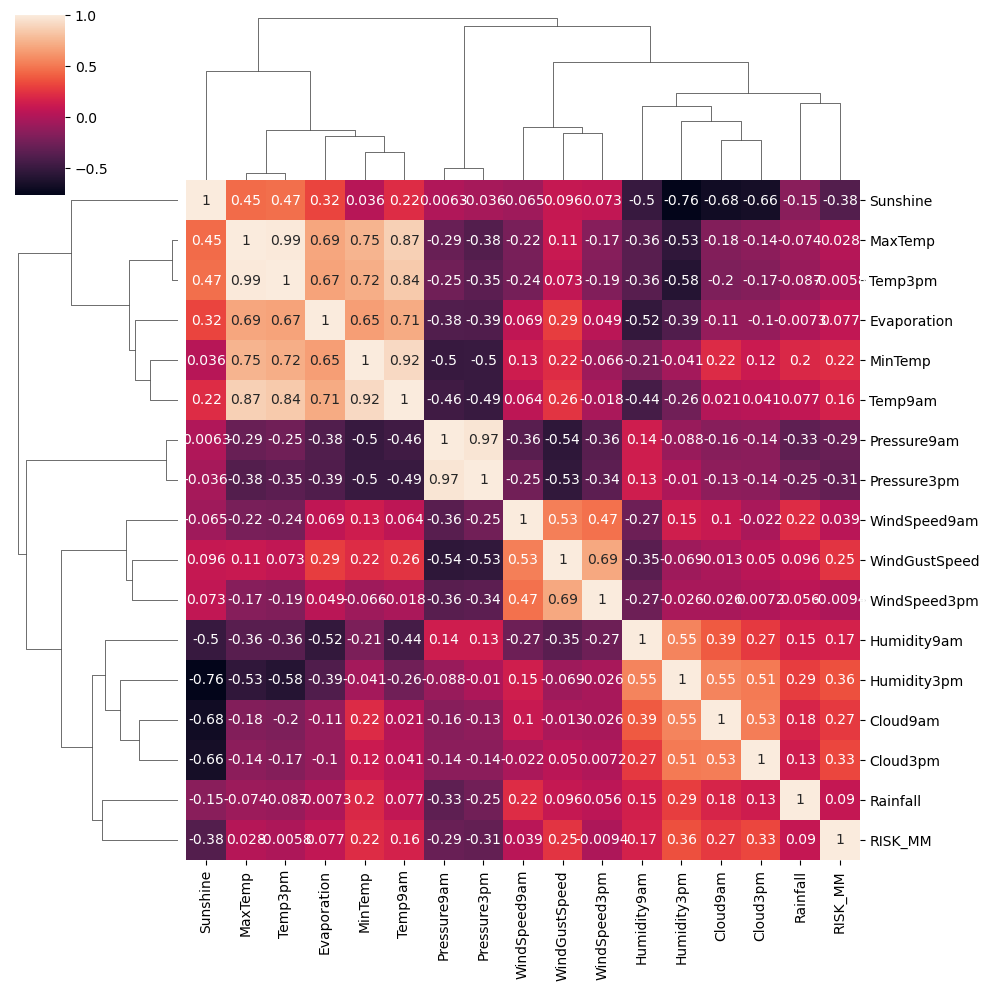

In [37]:
plt.figure(figsize=(20,30))
sns.clustermap(cor_col, annot=True)

In [38]:
fig = px.imshow(cor_col, text_auto=True, aspect="auto")
fig.show()

### visualize the data through jointplot

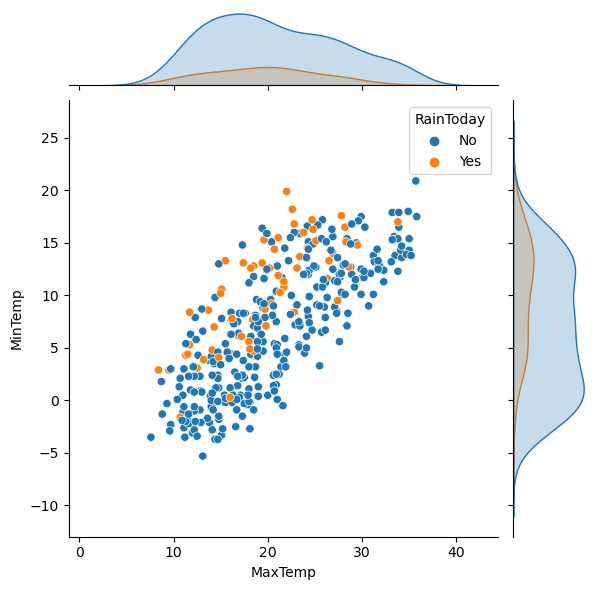

In [39]:
sns.jointplot(data=data, x="MaxTemp", y="MinTemp",hue="RainToday")

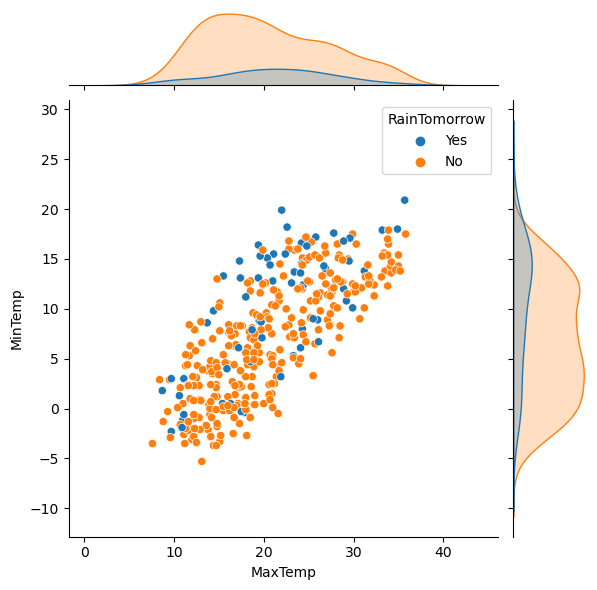

In [40]:
sns.jointplot(data=data, x="MaxTemp", y="MinTemp",hue="RainTomorrow")

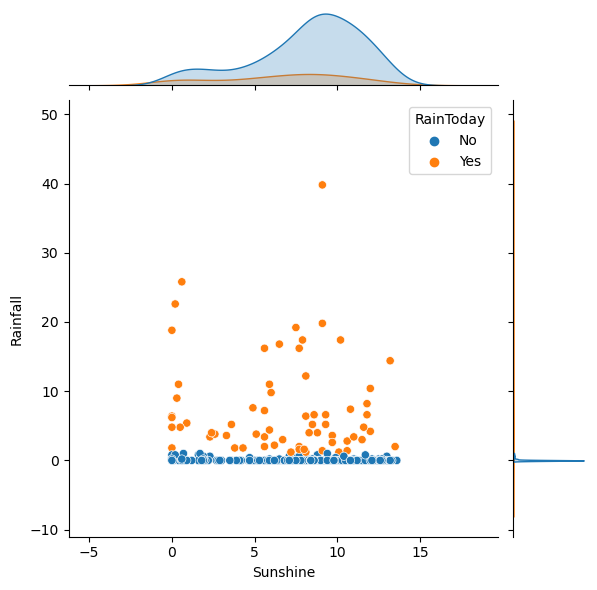

In [41]:
sns.jointplot(data=data, x="Sunshine", y="Rainfall", hue="RainToday")

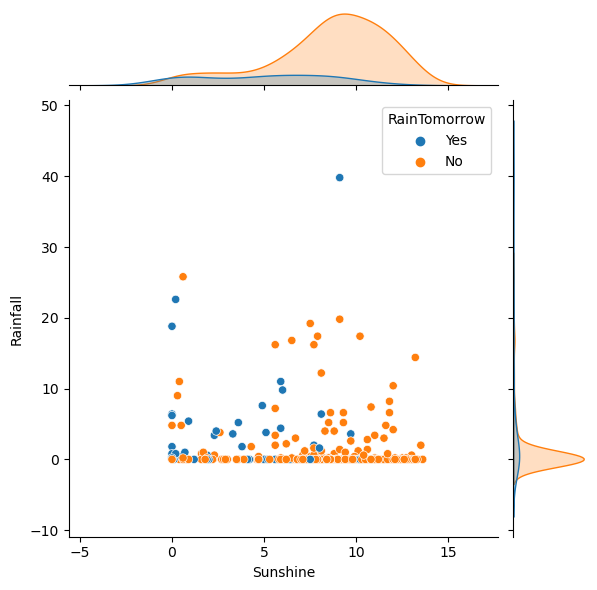

In [42]:
sns.jointplot(data=data, x="Sunshine", y="Rainfall", hue="RainTomorrow")

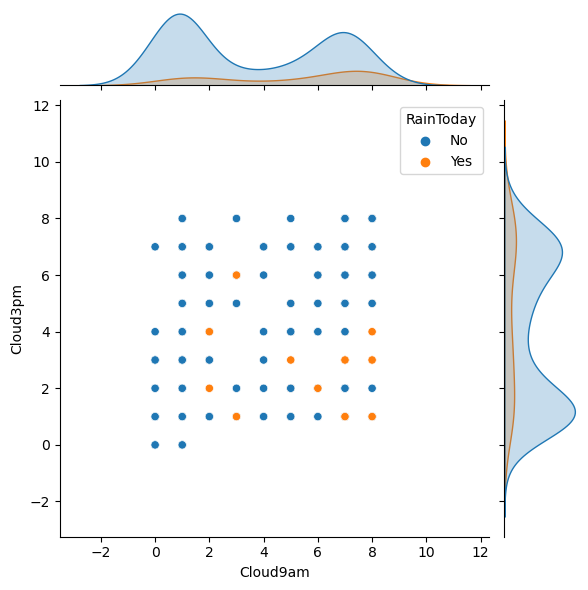

In [43]:
sns.jointplot(data=data, x="Cloud9am", y="Cloud3pm", hue="RainToday")

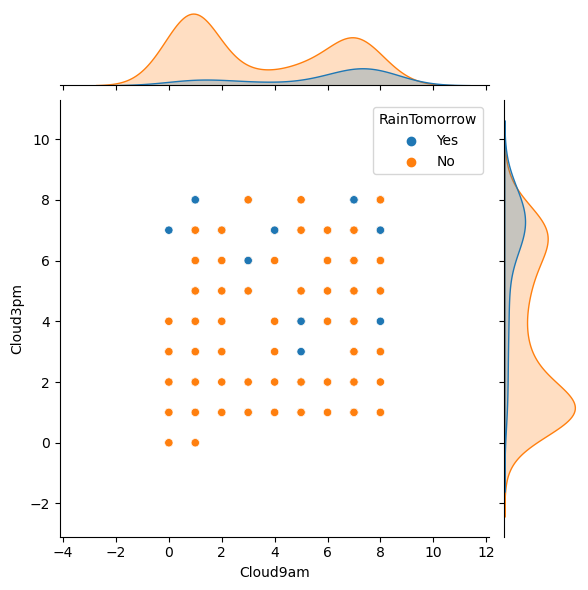

In [44]:
sns.jointplot(data=data, x="Cloud9am", y="Cloud3pm", hue="RainTomorrow")

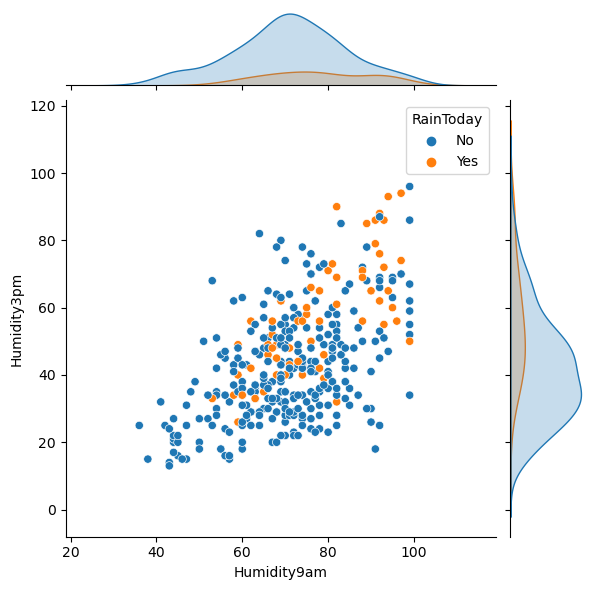

In [45]:
sns.jointplot(data=data, x="Humidity9am", y="Humidity3pm", hue="RainToday")

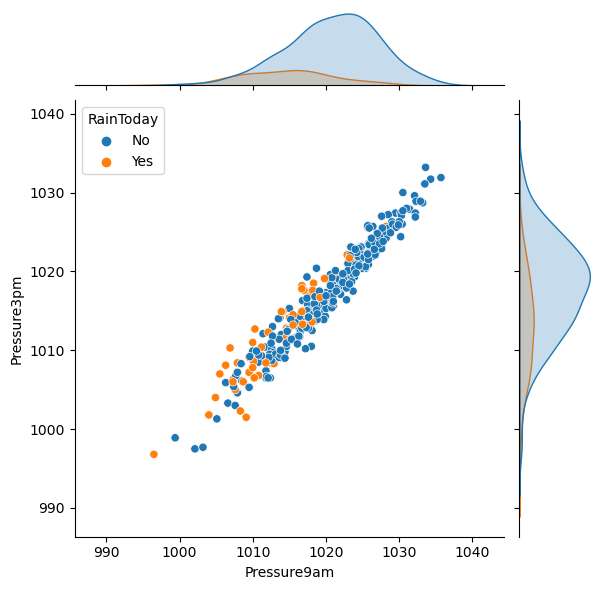

In [46]:
sns.jointplot(data=data, x="Pressure9am", y="Pressure3pm", hue="RainToday")

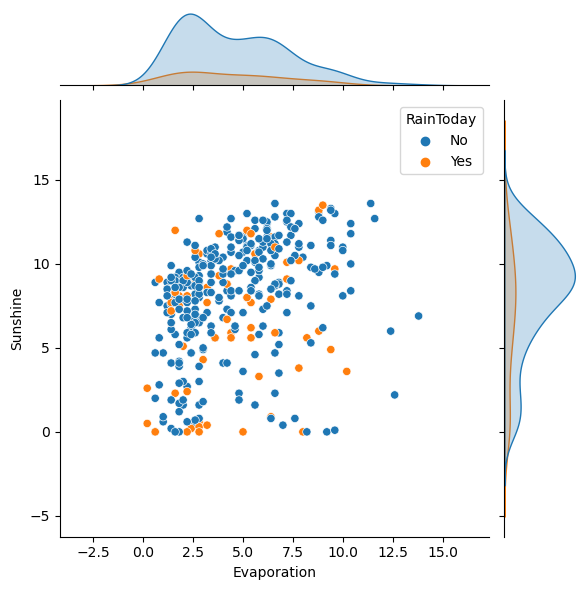

In [47]:
sns.jointplot(data=data, x="Evaporation", y="Sunshine", hue="RainToday")

#### Visualisation of the Descriptive Analysis of the Data with respect to Standard Deviation

In [48]:
data.describe().T.style.bar(subset=['std'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds')\
.background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
MinTemp,366.000000,7.265574,6.025800,-5.300000,2.300000,7.450000,12.500000,20.900000
MaxTemp,366.000000,20.550273,6.690516,7.600000,15.025000,19.650000,25.500000,35.800000
Rainfall,366.000000,1.428415,4.225800,0.000000,0.000000,0.000000,0.200000,39.800000
Evaporation,366.000000,4.521858,2.669383,0.200000,2.200000,4.200000,6.400000,13.800000
Sunshine,363.000000,7.909366,3.481517,0.000000,5.950000,8.600000,10.500000,13.600000
WindGustSpeed,364.000000,39.840659,13.059807,13.000000,31.000000,39.000000,46.000000,98.000000
WindSpeed9am,359.000000,9.651811,7.951929,0.000000,6.000000,7.000000,13.000000,41.000000
WindSpeed3pm,366.000000,17.986339,8.856997,0.000000,11.000000,17.000000,24.000000,52.000000
Humidity9am,366.000000,72.035519,13.137058,36.000000,64.000000,72.000000,81.000000,99.000000
Humidity3pm,366.000000,44.519126,16.850947,13.000000,32.250000,43.000000,55.000000,96.000000


#### Visualisation of the Descriptive Analysis of the Data with respect to Min

In [49]:
data.describe().T.style.bar(subset=['min'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds')\
.background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
MinTemp,366.000000,7.265574,6.025800,-5.300000,2.300000,7.450000,12.500000,20.900000
MaxTemp,366.000000,20.550273,6.690516,7.600000,15.025000,19.650000,25.500000,35.800000
Rainfall,366.000000,1.428415,4.225800,0.000000,0.000000,0.000000,0.200000,39.800000
Evaporation,366.000000,4.521858,2.669383,0.200000,2.200000,4.200000,6.400000,13.800000
Sunshine,363.000000,7.909366,3.481517,0.000000,5.950000,8.600000,10.500000,13.600000
WindGustSpeed,364.000000,39.840659,13.059807,13.000000,31.000000,39.000000,46.000000,98.000000
WindSpeed9am,359.000000,9.651811,7.951929,0.000000,6.000000,7.000000,13.000000,41.000000
WindSpeed3pm,366.000000,17.986339,8.856997,0.000000,11.000000,17.000000,24.000000,52.000000
Humidity9am,366.000000,72.035519,13.137058,36.000000,64.000000,72.000000,81.000000,99.000000
Humidity3pm,366.000000,44.519126,16.850947,13.000000,32.250000,43.000000,55.000000,96.000000


### Visualisation of the Descriptive Analysis of the Data with respect to Max

In [50]:
data.describe().T.style.bar(subset=['max'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds')\
.background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
MinTemp,366.000000,7.265574,6.025800,-5.300000,2.300000,7.450000,12.500000,20.900000
MaxTemp,366.000000,20.550273,6.690516,7.600000,15.025000,19.650000,25.500000,35.800000
Rainfall,366.000000,1.428415,4.225800,0.000000,0.000000,0.000000,0.200000,39.800000
Evaporation,366.000000,4.521858,2.669383,0.200000,2.200000,4.200000,6.400000,13.800000
Sunshine,363.000000,7.909366,3.481517,0.000000,5.950000,8.600000,10.500000,13.600000
WindGustSpeed,364.000000,39.840659,13.059807,13.000000,31.000000,39.000000,46.000000,98.000000
WindSpeed9am,359.000000,9.651811,7.951929,0.000000,6.000000,7.000000,13.000000,41.000000
WindSpeed3pm,366.000000,17.986339,8.856997,0.000000,11.000000,17.000000,24.000000,52.000000
Humidity9am,366.000000,72.035519,13.137058,36.000000,64.000000,72.000000,81.000000,99.000000
Humidity3pm,366.000000,44.519126,16.850947,13.000000,32.250000,43.000000,55.000000,96.000000


## Data PreProcessing

#### Handling Missing Values

In [51]:
data.dropna(inplace=True)

In [53]:
data.shape

(328, 22)

-- before there was 366 Rows was there, after applying drop function duplicate values are drop which was 38 nos.

###### Categorical

In [78]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [79]:
le= label_encoder
data['WindGustDir']=le.fit_transform(data['WindGustDir'])
data['WindDir9am']=le.fit_transform(data['WindDir9am'])
data['WindDir3pm']=le.fit_transform(data['WindDir3pm'])
data['RainToday']=le.fit_transform(data['RainToday'])
data['RainTomorrow']=le.fit_transform(data['RainTomorrow'])

In [80]:
data.shape

(328, 22)

#### Feature Selection

In [82]:
x=data.drop(['RainTomorrow'], axis=1)
y=data[['RainTomorrow']]

In [83]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,6,76.0,10,7,7.0,...,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0
362,7.1,28.4,0.0,11.6,12.7,3,48.0,6,6,2.0,...,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0
363,12.5,19.9,0.0,8.4,5.3,2,43.0,1,1,11.0,...,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0
364,12.5,26.9,0.0,5.0,7.1,7,46.0,11,14,6.0,...,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0


In [84]:
y

,RainTomorrow
0,1
1,1
2,1
3,1
4,0
...,...
361,0
362,0
363,0
364,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42) 

NameError: name 'x' is not defined

#### Standardisation of Data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

NameError: name 'x_train' is not defined

#### Scalarization of the Data

In [15]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

NameError: name 'x_train' is not defined

In [16]:
scaler.fit(x_train_scaled)

NameError: name 'x_train_scaled' is not defined

In [17]:
x_train_scaled = scaler.transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

NameError: name 'x_train_scaled' is not defined

In [18]:
x_train_scaled.shape

NameError: name 'x_train_scaled' is not defined

In [19]:
x_test_scaled.shape

NameError: name 'x_test_scaled' is not defined

In [20]:
x_train.shape

NameError: name 'x_train' is not defined

In [110]:
x_test.shape

(66, 21)

## Model Building

In [111]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [112]:
lr.fit(x_train_scaled,y_train)

C:\Users\AL FARES\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [113]:
y_pred=lr.predict(x_test_scaled)

In [117]:
x_test_scaled[0:5]

array([[-1.72388956, -1.42266493, -0.28410168, -1.20846867, -0.39869914,
        -0.72973428, -1.51313215, -1.83227598, -0.37472931, -1.05266566,
        -1.21047204,  1.17263878,  0.56717737,  1.14473743,  0.93861963,
        -0.98966546,  1.10094407, -2.1465194 , -1.41004752, -0.45538256,
        -0.34487734],
       [ 0.62378509,  0.91810412, -0.33803983,  0.38181945,  1.19176138,
        -0.50239732, -0.53426641, -1.31413641,  0.27546327, -0.54498337,
        -0.32982317, -0.19384614, -0.36668262, -0.25359957, -0.56023625,
        -0.98966546, -0.77209065,  0.74720004,  0.97044876, -0.45538256,
        -0.34487734],
       [-0.7680506 , -1.21784764, -0.01441095, -1.20846867, -0.19989158,
        -0.72973428,  0.21870723,  1.79470097, -1.02492189, -0.54498337,
         1.32139346, -0.19384614,  1.03410736,  0.07022584,  0.39358113,
         0.67459866, -0.77209065, -0.92432734, -1.20432562,  2.19595588,
        -0.34487734],
       [ 0.12071195,  0.28902244,  4.03094998,  0.30609144

In [122]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Model Evaluation of Logistic Regression

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.70      0.82        10

    accuracy                           0.95        66
   macro avg       0.97      0.85      0.90        66
weighted avg       0.96      0.95      0.95        66



## K Nearest Neighbour

In [127]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_scaled,y_train)
neigh

C:\Users\AL FARES\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=4)

In [129]:
yhat = neigh.predict(x_test_scaled)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [131]:
from sklearn.metrics import accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(x_train_scaled)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.8702290076335878
Test set Accuracy:  0.8787878787878788


## Model Evaluation of the KNN

In [132]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.75      0.30      0.43        10

    accuracy                           0.88        66
   macro avg       0.82      0.64      0.68        66
weighted avg       0.87      0.88      0.86        66



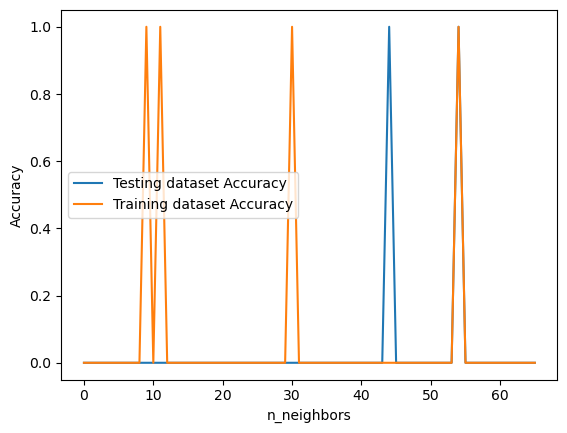

In [148]:
plt.plot(y_pred , label = 'Testing dataset Accuracy')
plt.plot(yhat , label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

# Compute training and test data accuracy
train_accuracy[i] = knn.score(x_train, y_train)
test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


NameError: name 'x_train' is not defined